In [39]:
%load_ext autoreload

%autoreload 2
import numpy as np
import corner, sys
import getdist
from getdist import plots, MCSamples
%matplotlib inline
import matplotlib.pyplot as plt
sys.path.append('../../modules/')
import numpy as np
#plt.switch_backend("Qt5Agg")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
names = ['1', '2', '3', '4', '5', '6']
labels = [r'\ln \lambda_0', r'\mu_z', r'\mu_m', r'\sigma_{\ln \lambda, 0}', r'\sigma_z', r'\sigma_m']
settings={'mult_bias_correction_order':0,'smooth_scale_2D':4, 'smooth_scale_1D':4, 'boundary_correction_order':0}

In [41]:
n_cut=19000
name='1-halo=nfw+c-M=Duffy08_rmin=1.0-rmax=3.5_photoz=Truez_hmf=Despali16'
t = np.load(f'../chains/M/MCMC_fit_m-r_M_{name}.pkl', allow_pickle = True)
Mbaseline = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='Lensing masses alone')
t = np.load('../chains/N/MCMC_fit_m-r_N_low_z_sample_hmf=Despali16.pkl', allow_pickle = True)
Nbaseline = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='Abundance alone')
t = np.load(f'../chains/MxN/MCMC_fit_m-r_MxN_{name}.pkl', allow_pickle = True)
MxNbaseline = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='Lensing masses + Abundance')
t = np.load(f'../chains/WL/MCMC_fit_m-r_WL_{name}.pkl', allow_pickle = True)
WLbaseline = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='Lensing profiles alone')
t = np.load(f'../chains/WLxN/MCMC_fit_m-r_WLxN_{name}.pkl', allow_pickle = True)
WLxNbaseline = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='Lensing profiles + Abundance')
t = np.load(f'../chains/WLxN/MCMC_fit_m-r_WLxN_1-halo=nfw+c-M=Duffy08_rmin=1.0-rmax=3.5_photoz=Truez_low_z_sample_hmf=Despali16.pkl', allow_pickle = True)
WLxNbaselinelowz = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='Lensing profiles + Abundance ($z < 0.8$)')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [42]:
list_chains = [Nbaseline, Mbaseline, WLbaseline, MxNbaseline, WLxNbaseline, WLxNbaselinelowz]
for chain in list_chains:
    means = chain.mean(['1', '2', '3', '4', '5', '6'])
    errors = np.diagonal(chain.cov(['1', '2', '3', '4', '5', '6']))**.5
    a = str(chain.label)
    for i, n in enumerate(['1', '2', '3', '4', '5', '6']):
        a += f' & ${means[i]:.2f} \pm {errors[i]:.2f}$ '
    a += '\{}'.format('\\')
    print(a)

Abundance alone & $3.27 \pm 0.14$  & $0.04 \pm 0.19$  & $2.22 \pm 0.20$  & $0.53 \pm 0.11$  & $0.06 \pm 0.25$  & $-0.11 \pm 0.14$ \\
Lensing masses alone & $3.37 \pm 0.20$  & $0.18 \pm 0.47$  & $2.34 \pm 0.44$  & $0.52 \pm 0.10$  & $-0.03 \pm 0.32$  & $-0.00 \pm 0.15$ \\
Lensing profiles alone & $3.31 \pm 0.19$  & $0.36 \pm 0.54$  & $2.41 \pm 0.45$  & $0.54 \pm 0.08$  & $-0.05 \pm 0.33$  & $-0.03 \pm 0.15$ \\
Lensing masses + Abundance & $3.33 \pm 0.04$  & $0.14 \pm 0.07$  & $2.14 \pm 0.06$  & $0.58 \pm 0.02$  & $0.06 \pm 0.11$  & $0.13 \pm 0.07$ \\
Lensing profiles + Abundance & $3.37 \pm 0.03$  & $0.08 \pm 0.07$  & $2.18 \pm 0.07$  & $0.53 \pm 0.03$  & $0.20 \pm 0.11$  & $0.14 \pm 0.05$ \\
Lensing profiles + Abundance ($z < 0.8$) & $3.34 \pm 0.04$  & $-0.04 \pm 0.13$  & $2.16 \pm 0.07$  & $0.54 \pm 0.02$  & $0.17 \pm 0.15$  & $0.08 \pm 0.08$ \\


# impact c(M) relation

In [43]:
n_cut=19000
name='1-halo=nfw+c-M=Duffy08_rmin=1.0-rmax=3.5_photoz=Truez_hmf=Despali16'
t = np.load(f'../chains/MxN/MCMC_fit_m-r_MxN_{name}.pkl', allow_pickle = True)
MxNcMDuffy08 = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='Duffy et al. 2008')
name='1-halo=nfw+c-M=Prada12_rmin=1.0-rmax=3.5_photoz=Truez_hmf=Despali16'
t = np.load(f'../chains/MxN/MCMC_fit_m-r_MxN_{name}.pkl', allow_pickle = True)
MxNcMPrada12 = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='Prada et al. 2012')
name='1-halo=nfw+c-M=Bhattacharya13_rmin=1.0-rmax=3.5_photoz=Truez_hmf=Despali16'
t = np.load(f'../chains/MxN/MCMC_fit_m-r_MxN_{name}.pkl', allow_pickle = True)
MxNcMBhattacharya13 = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='Bhattacharya et al. 2013')
name='1-halo=nfw+c-M=Diemer15_rmin=1.0-rmax=3.5_photoz=Truez_hmf=Despali16'
t = np.load(f'../chains/MxN/MCMC_fit_m-r_MxN_{name}.pkl', allow_pickle = True)
MxNcMDiemer15 = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='Diemer & Kravtsov 2014')
name='1-halo=nfw+c-M=None_rmin=1.0-rmax=3.5_photoz=Truez_hmf=Despali16'
t = np.load(f'../chains/MxN/MCMC_fit_m-r_MxN_{name}.pkl', allow_pickle = True)
MxNcMnone = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='free concentration')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [44]:
list_chains = [MxNcMDuffy08, MxNcMPrada12, MxNcMBhattacharya13, MxNcMDiemer15, MxNcMnone]

In [45]:
for chain in list_chains:
    means = chain.mean(['1', '2', '3', '4', '5', '6'])
    errors = np.diagonal(chain.cov(['1', '2', '3', '4', '5', '6']))**.5
    a = str(chain.label)
    for i, n in enumerate(['1', '2', '3', '4', '5', '6']):
        a += f' & ${means[i]:.2f} \pm {errors[i]:.2f}$ '
    a += '\{}'.format('\\')
    print(a)

Duffy et al. 2008 & $3.33 \pm 0.04$  & $0.14 \pm 0.07$  & $2.14 \pm 0.06$  & $0.58 \pm 0.02$  & $0.06 \pm 0.11$  & $0.13 \pm 0.07$ \\
Prada et al. 2012 & $3.40 \pm 0.04$  & $0.17 \pm 0.06$  & $2.22 \pm 0.07$  & $0.52 \pm 0.03$  & $0.02 \pm 0.10$  & $0.16 \pm 0.05$ \\
Bhattacharya et al. 2013 & $3.37 \pm 0.04$  & $0.14 \pm 0.08$  & $2.19 \pm 0.06$  & $0.55 \pm 0.03$  & $0.07 \pm 0.12$  & $0.14 \pm 0.05$ \\
Diemer & Kravtsov 2014 & $3.38 \pm 0.03$  & $0.15 \pm 0.07$  & $2.20 \pm 0.07$  & $0.54 \pm 0.03$  & $0.06 \pm 0.12$  & $0.15 \pm 0.05$ \\
free concentration & $3.37 \pm 0.04$  & $0.14 \pm 0.08$  & $2.19 \pm 0.08$  & $0.54 \pm 0.03$  & $0.08 \pm 0.14$  & $0.15 \pm 0.06$ \\


# impact halo model

In [46]:
n_cut=19000
name='1-halo=nfw+c-M=None_rmin=1.0-rmax=3.5_photoz=Truez_hmf=Despali16'
t = np.load(f'../chains/MxN/MCMC_fit_m-r_MxN_{name}.pkl', allow_pickle = True)
MxNhM_NFW = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='Navarro-Frenk-White (NFW)')
name='1-halo=hernquist+c-M=None_rmin=1.0-rmax=3.5_photoz=Truez_hmf=Despali16'
t = np.load(f'../chains/MxN/MCMC_fit_m-r_MxN_{name}.pkl', allow_pickle = True)
MxNhM_hernquist = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='Hernquist')
name='1-halo=einasto+c-M=None_rmin=1.0-rmax=3.5_photoz=Truez_hmf=Despali16'
t = np.load(f'../chains/MxN/MCMC_fit_m-r_MxN_{name}.pkl', allow_pickle = True)
MxNhM_einasto = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='Einasto')

Removed no burn in
Removed no burn in
Removed no burn in


In [47]:
list_chains = [MxNhM_NFW, MxNhM_einasto, MxNhM_hernquist]
for chain in list_chains:
    means = chain.mean(['1', '2', '3', '4', '5', '6'])
    errors = np.diagonal(chain.cov(['1', '2', '3', '4', '5', '6']))**.5
    a = str(chain.label)
    for i, n in enumerate(['1', '2', '3', '4', '5', '6']):
        a += f' & ${means[i]:.2f} \pm {errors[i]:.2f}$ '
    a += '\{}'.format('\\')
    print(a)

Navarro-Frenk-White (NFW) & $3.37 \pm 0.04$  & $0.14 \pm 0.08$  & $2.19 \pm 0.08$  & $0.54 \pm 0.03$  & $0.08 \pm 0.14$  & $0.15 \pm 0.06$ \\
Einasto & $3.36 \pm 0.04$  & $0.13 \pm 0.08$  & $2.18 \pm 0.07$  & $0.55 \pm 0.03$  & $0.08 \pm 0.14$  & $0.14 \pm 0.06$ \\
Hernquist & $3.36 \pm 0.05$  & $0.14 \pm 0.08$  & $2.17 \pm 0.08$  & $0.55 \pm 0.03$  & $0.08 \pm 0.13$  & $0.13 \pm 0.06$ \\


# Impact photoz

In [48]:
n_cut=19000
name='1-halo=nfw+c-M=Duffy08_rmin=1.0-rmax=3.5_photoz=Truez_hmf=Despali16'
t = np.load(f'../chains/WLxN/MCMC_fit_m-r_WLxN_{name}.pkl', allow_pickle = True)
WLxNPZ_true = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='true source redshifts')
name='1-halo=nfw+c-M=Duffy08_rmin=1.0-rmax=3.5_photoz=BPZ_hmf=Despali16'
t = np.load(f'../chains/WLxN/MCMC_fit_m-r_WLxN_{name}.pkl', allow_pickle = True)
WLxNPZ_bpz = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='BPZ')

name='1-halo=nfw+c-M=Duffy08+lensing_bias_rmin=1.0-rmax=3.5_photoz=BPZ_hmf=Despali16'
t = np.load(f'../chains/WLxN/MCMC_fit_m-r_WLxN_{name}.pkl', allow_pickle = True)
WLxNPZ_bpzb = MCSamples(samples=t['flat_chains'][n_cut:],names = names+['7'], 
                    labels = labels+['b'], 
                     settings=settings, 
                     label='BPZ (with factor 1+b)')

name='1-halo=nfw+c-M=Duffy08_rmin=1.0-rmax=3.5_photoz=flex_hmf=Despali16'
t = np.load(f'../chains/WLxN/MCMC_fit_m-r_WLxN_{name}.pkl', allow_pickle = True)
WLxNPZ_flex = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='FlexZBoost')
name='1-halo=nfw+c-M=Duffy08+lensing_bias_rmin=1.0-rmax=3.5_photoz=flex_hmf=Despali16'
t = np.load(f'../chains/WLxN/MCMC_fit_m-r_WLxN_{name}.pkl', allow_pickle = True)
WLxNPZ_flexb = MCSamples(samples=t['flat_chains'][n_cut:],names = names+['7'], 
                    labels = labels+['b'], 
                     settings=settings, 
                     label='FlexZBoost (with factor 1+b)')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [49]:
list_chains = [WLxNPZ_true, WLxNPZ_bpz, WLxNPZ_bpzb, WLxNPZ_flex, WLxNPZ_flexb]
for chain in list_chains:
    means = chain.mean(['1', '2', '3', '4', '5', '6'])
    errors = np.diagonal(chain.cov(['1', '2', '3', '4', '5', '6']))**.5
    a = str(chain.label)
    for i, n in enumerate(['1', '2', '3', '4', '5', '6']):
        a += f' & ${means[i]:.2f} \pm {errors[i]:.2f}$ '
    a += '\{}'.format('\\')
    print(a)

true source redshifts & $3.37 \pm 0.03$  & $0.08 \pm 0.07$  & $2.18 \pm 0.07$  & $0.53 \pm 0.03$  & $0.20 \pm 0.11$  & $0.14 \pm 0.05$ \\
BPZ & $3.29 \pm 0.03$  & $-0.02 \pm 0.08$  & $2.07 \pm 0.06$  & $0.59 \pm 0.02$  & $0.32 \pm 0.11$  & $0.14 \pm 0.06$ \\
BPZ (with factor 1+b) & $3.33 \pm 0.07$  & $-0.04 \pm 0.09$  & $2.12 \pm 0.11$  & $0.55 \pm 0.06$  & $0.40 \pm 0.15$  & $0.13 \pm 0.06$ \\
FlexZBoost & $3.37 \pm 0.03$  & $0.09 \pm 0.08$  & $2.18 \pm 0.06$  & $0.54 \pm 0.02$  & $0.17 \pm 0.12$  & $0.14 \pm 0.05$ \\
FlexZBoost (with factor 1+b) & $3.33 \pm 0.07$  & $0.08 \pm 0.07$  & $2.12 \pm 0.10$  & $0.57 \pm 0.06$  & $0.17 \pm 0.13$  & $0.14 \pm 0.06$ \\


# Impact shear-richness covariance

In [50]:
n_cut=18000
probe='WLxN'
name='1-halo=nfw+c-M=Duffy08_rmin=1.0-rmax=3.5_photoz=Truez_hmf=Despali16'
t = np.load(f'../chains/{probe}/MCMC_fit_m-r_{probe}_{name}.pkl', allow_pickle = True)
WL_true_no_shear_richness_cov = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'Without Cov($\Delta\Sigma,\lambda$) correction')


name='1-halo=nfw+c-M=Duffy08_rmin=1.0-rmax=3.5+cov(g,richness)_photoz=Truez_hmf=Despali16'
t = np.load(f'../chains/{probe}/MCMC_fit_m-r_{probe}_{name}.pkl', allow_pickle = True)
WL_true_shear_richness_cov = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'With Cov($\Delta\Sigma,\lambda$) correction')
name='1-halo=nfw+c-M=Duffy08_rmin=1.0-rmax=3.5+cov(g,richness)_photoz=BPZ_hmf=Despali16'
t = np.load(f'../chains/{probe}/MCMC_fit_m-r_{probe}_{name}.pkl', allow_pickle = True)
WL_bpz_shear_richness_cov = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='With Cov($\Delta\Sigma,\lambda$) correction - BPZ')

name='1-halo=nfw+c-M=Duffy08_rmin=1.0-rmax=3.5+cov(g,richness)_photoz=flex_hmf=Despali16'
t = np.load(f'../chains/{probe}/MCMC_fit_m-r_{probe}_{name}.pkl', allow_pickle = True)
WL_flex_shear_richness_cov = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='With Cov($\Delta\Sigma,\lambda$) correction - FlexZBoost')

name='1-halo=nfw+c-M=Duffy08+lensing_bias_rmin=1.0-rmax=3.5+cov(g,richness)_photoz=BPZ_hmf=Despali16'
t = np.load(f'../chains/{probe}/MCMC_fit_m-r_{probe}_{name}.pkl', allow_pickle = True)
WL_bpz_shear_richness_cov_lensing_bias = MCSamples(samples=t['flat_chains'][n_cut:],names = names + ['7'], 
                    labels = labels + ['b'], 
                     settings=settings, 
                     label='With Cov($\Delta\Sigma,\lambda$) correction - BPZ (1+b)')

name='1-halo=nfw+c-M=Duffy08+lensing_bias_rmin=1.0-rmax=3.5+cov(g,richness)_photoz=flex_hmf=Despali16'
t = np.load(f'../chains/{probe}/MCMC_fit_m-r_{probe}_{name}.pkl', allow_pickle = True)
WL_flex_shear_richness_cov_lensing_bias = MCSamples(samples=t['flat_chains'][n_cut:],names = names+ ['7'], 
                    labels = labels+ ['b'], 
                     settings=settings, 
                     label='With Cov($\Delta\Sigma,\lambda$) correction - FlexZBoost (1+b)')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [51]:
list_chains = [WL_true_no_shear_richness_cov, WL_true_shear_richness_cov, 
               WL_bpz_shear_richness_cov, WL_flex_shear_richness_cov,
              WL_bpz_shear_richness_cov_lensing_bias, WL_flex_shear_richness_cov_lensing_bias]
for chain in list_chains:
    means = chain.mean(['1', '2', '3', '4', '5', '6'])
    errors = np.diagonal(chain.cov(['1', '2', '3', '4', '5', '6']))**.5
    a = str(chain.label)
    for i, n in enumerate(['1', '2', '3', '4', '5', '6']):
        a += f' & ${means[i]:.2f} \pm {errors[i]:.2f}$ '
    a += '\{}'.format('\\')
    print(a)

Without Cov($\Delta\Sigma,\lambda$) correction & $3.37 \pm 0.03$  & $0.08 \pm 0.07$  & $2.18 \pm 0.07$  & $0.53 \pm 0.03$  & $0.20 \pm 0.12$  & $0.14 \pm 0.04$ \\
With Cov($\Delta\Sigma,\lambda$) correction & $3.37 \pm 0.03$  & $0.09 \pm 0.07$  & $2.18 \pm 0.06$  & $0.54 \pm 0.02$  & $0.16 \pm 0.12$  & $0.15 \pm 0.05$ \\
With Cov($\Delta\Sigma,\lambda$) correction - BPZ & $3.29 \pm 0.03$  & $-0.03 \pm 0.07$  & $2.05 \pm 0.07$  & $0.60 \pm 0.02$  & $0.31 \pm 0.10$  & $0.15 \pm 0.06$ \\
With Cov($\Delta\Sigma,\lambda$) correction - FlexZBoost & $3.36 \pm 0.04$  & $0.10 \pm 0.07$  & $2.18 \pm 0.07$  & $0.55 \pm 0.02$  & $0.15 \pm 0.12$  & $0.14 \pm 0.06$ \\
With Cov($\Delta\Sigma,\lambda$) correction - BPZ (1+b) & $3.32 \pm 0.06$  & $-0.03 \pm 0.08$  & $2.10 \pm 0.11$  & $0.56 \pm 0.06$  & $0.37 \pm 0.14$  & $0.13 \pm 0.06$ \\
With Cov($\Delta\Sigma,\lambda$) correction - FlexZBoost (1+b) & $3.33 \pm 0.07$  & $0.11 \pm 0.08$  & $2.13 \pm 0.11$  & $0.57 \pm 0.06$  & $0.12 \pm 0.12$  & $0.1

# Plot tension metric

In [52]:
list_chain_baseline = [Nbaseline, Mbaseline, WLbaseline, MxNbaseline, WLxNbaseline, WLxNbaselinelowz]
likelihood_baseline = ['N', 'M', 'WL', 'MxN', 'WLxN', 'WLxN']
list_chains_cM = [MxNcMDuffy08, MxNcMPrada12, MxNcMBhattacharya13, MxNcMDiemer15, MxNcMnone]
likelihood_cM = ['MxN', 'MxN', 'MxN', 'MxN', 'MxN', 'MxN']
list_chains_hM = [MxNhM_NFW, MxNhM_einasto, MxNhM_hernquist]
likelihood_hM = ['MxN', 'MxN', 'MxN',]
list_chains_PZ = [WLxNPZ_bpz, WLxNPZ_bpzb, WLxNPZ_flex, WLxNPZ_flexb]
likelihood_PZ = ['WLxN', 'WLxN', 'WLxN','WLxN', 'WLxN']
list_chains_shear_richness = [WL_true_shear_richness_cov, WL_bpz_shear_richness_cov, WL_flex_shear_richness_cov, WL_bpz_shear_richness_cov_lensing_bias, WL_flex_shear_richness_cov_lensing_bias]
likelihood_shear_richness = ['WLxN', 'WLxN', 'WLxN','WLxN', 'WLxN','WLxN']
sections = [list_chain_baseline, list_chains_cM, list_chains_hM, list_chains_PZ, list_chains_shear_richness]
color_section = ['C0', 'C1', 'C2', 'C3', 'C4']
baseline_per_section = [WLxNbaseline, WLxNbaseline, WLxNbaseline,WLxNbaseline,WLxNbaseline]

In [53]:
sections_name = ['baseline', r'$c(M)$', 'halo model', r'photo-$z$s', 'Cov($\Delta\Sigma,\lambda$)']

In [54]:
truth = {'1': 3.345953364933381,
 '2': 0.06378674560099672,
 '3': 2.2274595352385975,
 '4': 0.5634900828247924,
 '5': -0.04529427946062734,
 '6': 0.09764409931399064}

truth_err = {'1': 0.01,
 '2': 0.08,
 '3': 0.05,
 '4': 0.01,
 '5': 0.04,
 '6': 0.02}
truth_err_array = np.array([truth_err[str(k+1)] for k in range(len(truth_err))])

In [55]:
mcmc_baseline_mean = WLxNbaseline.mean(['1', '2', '3', '4', '5', '6'])
mcmc_baseline_error = np.diagonal(WLxNbaseline.cov(['1', '2', '3', '4', '5', '6']))**.5

Abundance alone
Lensing masses alone
Lensing profiles alone
Lensing masses + Abundance
Lensing profiles + Abundance
Lensing profiles + Abundance ($z < 0.8$)
Duffy et al. 2008
Prada et al. 2012
Bhattacharya et al. 2013
Diemer & Kravtsov 2014
free concentration
Navarro-Frenk-White (NFW)
Einasto
Hernquist
BPZ
BPZ (with factor 1+b)
FlexZBoost
FlexZBoost (with factor 1+b)
With Cov($\Delta\Sigma,\lambda$) correction
With Cov($\Delta\Sigma,\lambda$) correction - BPZ
With Cov($\Delta\Sigma,\lambda$) correction - FlexZBoost
With Cov($\Delta\Sigma,\lambda$) correction - BPZ (1+b)
With Cov($\Delta\Sigma,\lambda$) correction - FlexZBoost (1+b)


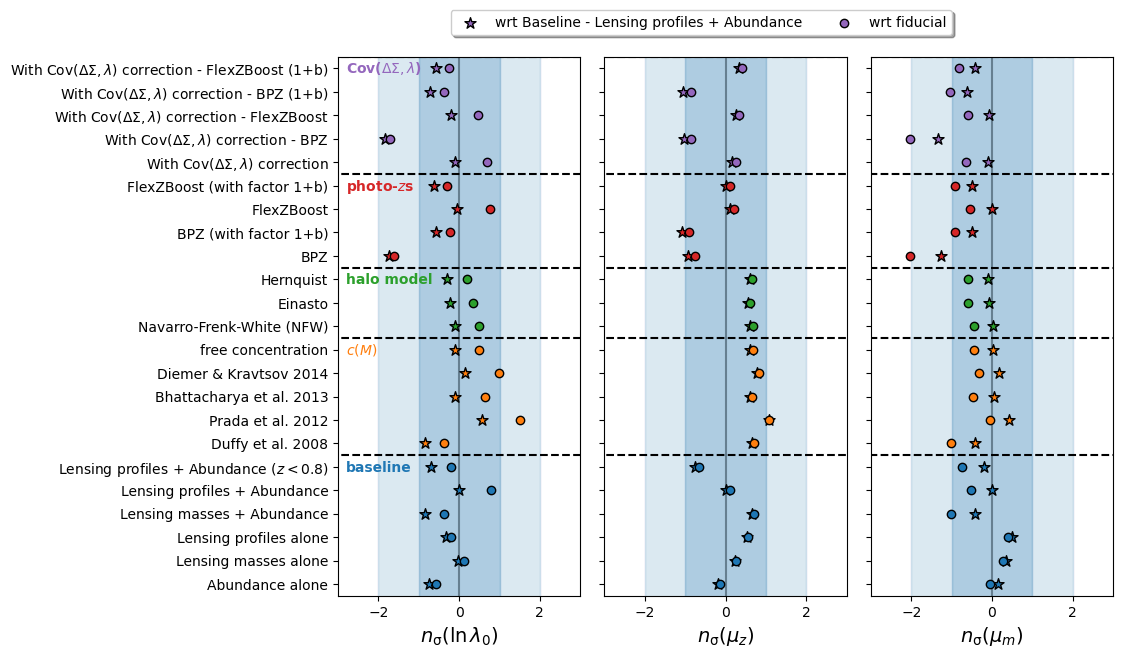

In [56]:
fig, ax = plt.subplots(1,3,figsize=(10,7), sharex=True,sharey = True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.1, hspace=0)
s = 0
for l, section in enumerate(sections):
    color = color_section[l]
    mcmc_baseline_mean = baseline_per_section[l].mean(['1', '2', '3', '4', '5', '6'])
    mcmc_baseline_error = np.diagonal(baseline_per_section[l].cov(['1', '2', '3', '4', '5', '6']))**.5
    for k in range(len(section)):
        mcmc = section[k]
        print(mcmc.label)
        means = mcmc.mean(['1', '2', '3', '4', '5', '6'])
        errors = np.diagonal(mcmc.cov(['1', '2', '3', '4', '5', '6']))**.5
        nsigma_analysis = (means - mcmc_baseline_mean)/np.sqrt(errors**2 + mcmc_baseline_error**2)
        nsigma_truth = (means - np.array([truth[str(k+1)] for k in range(len(truth))]))/np.sqrt(errors**2 + truth_err_array**2)
        for j in range(3):
            ax[j].scatter(nsigma_analysis[j], mcmc.label,  marker = '*', color = color, alpha=1,s=70,
                         edgecolors='k')
            ax[j].scatter(nsigma_truth[j], mcmc.label, marker = 'o', color = color, alpha=1,
                         edgecolors='k')
        s = s+1
    for j in range(3):
        ax[j].hlines(s-.5, -20, 10,ls='--', color = 'k')
        ax[j].vlines(0, -10, 100,ls='-', color = 'k', alpha=.1, zorder=0)
        ax[j].set_xlim(-3, 3)
        ax[j].set_ylim(-.5, 22.5)
        x = np.linspace(-1,1,10)
        ax[j].fill_between(x, 30+0*x, -30+0*x, alpha=.05,color='C0',zorder=0)
        x = np.linspace(-2,2,10)
        ax[j].fill_between(x, 30+0*x, -30+0*x, alpha=.03,color='C0',zorder=0)
        ax[j].tick_params(axis='both', which="both", labelsize= 10)
    ax[0].text(-2.8, s-1.2, sections_name[l], ha='left', rotation=0, wrap=True, color=color_section[l],fontweight='bold')
ax[0].scatter([], [],  marker = '*', color = color, alpha=1,s=70,
                         edgecolors='k', label = 'wrt Baseline - Lensing profiles + Abundance')
ax[0].scatter([], [], marker = 'o', color = color, alpha=1,
                         edgecolors='k', label = 'wrt fiducial')
ax[0].legend(loc='upper center', bbox_to_anchor=(1.5, 1.1),
          ncol=3, fancybox=True, shadow=True)
ax[0].set_xlabel(r'$n_{\rm \sigma}(\ln \lambda_0)$', fontsize=14)
ax[1].set_xlabel(r'$n_{\rm \sigma}(\mu_z)$', fontsize=14)
ax[2].set_xlabel(r'$n_{\rm \sigma}(\mu_m)$', fontsize=14)
plt.savefig(f'../fig/summary_tension.png', dpi = 300, bbox_inches='tight',)

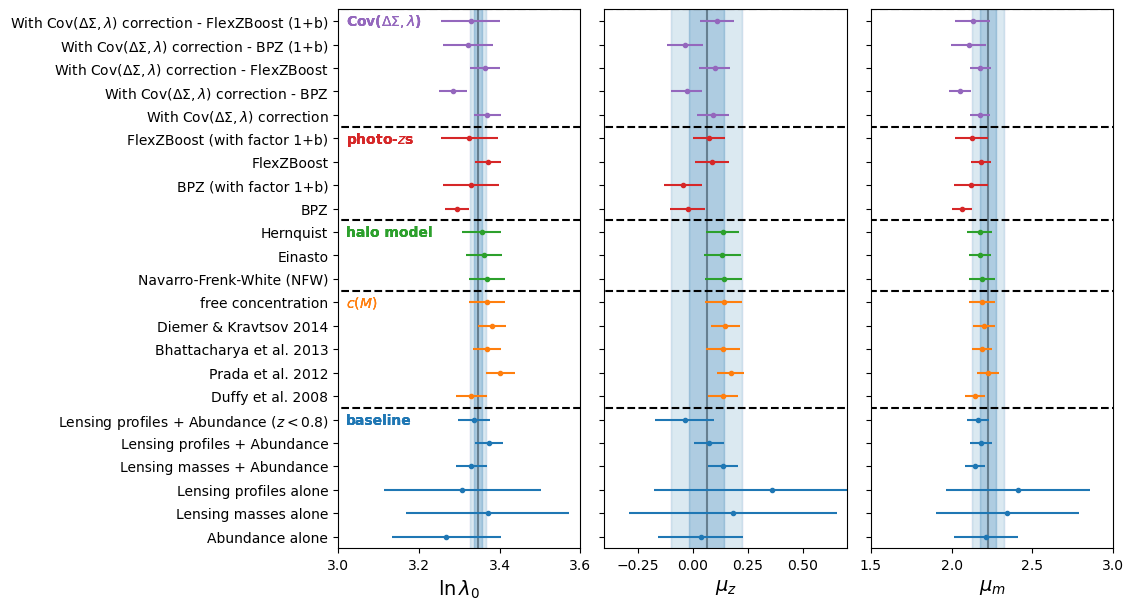

In [57]:
fig, ax = plt.subplots(1,3,figsize=(10,7), sharey = True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.1, hspace=0)
s = 0
for l, section in enumerate(sections):
    color = color_section[l]
    mcmc_baseline_mean = baseline_per_section[l].mean(['1', '2', '3', '4', '5', '6'])
    mcmc_baseline_error = np.diagonal(baseline_per_section[l].cov(['1', '2', '3', '4', '5', '6']))**.5
    for k in range(len(section)):
        mcmc = section[k]
        means = mcmc.mean(['1', '2', '3', '4', '5', '6'])
        errors = np.diagonal(mcmc.cov(['1', '2', '3', '4', '5', '6']))**.5
        nsigma_analysis = (mcmc_baseline_mean - means)/np.sqrt(errors**2 + mcmc_baseline_error**2)
        nsigma_truth = (mcmc_baseline_mean - np.array([truth[str(k+1)] for k in range(len(truth))]))/np.sqrt(errors**2)
        for j in range(3):
            ax[j].errorbar(means[j], mcmc.label, xerr= errors[j], marker = '.', color = color,)
            #ax[j].errorbar(nsigma_truth[j], mcmc.label, marker = 'o', color = color, alpha=.8)
        s = s+1
    for j in range(3):
        t = [truth[str(k+1)] for k in range(len(truth))]
        ax[j].hlines(s-.5, -2, 10,ls='--', color = 'k')
        ax[j].vlines(t[j], -10, 100,ls='-', color = 'k', alpha=.1, zorder=0)
        x = np.linspace(t[j]-truth_err_array[j],t[j]+truth_err_array[j],10)
        ax[j].fill_between(x, 30+0*x, -30+0*x, alpha=.05,color='C0',zorder=0)
        x = np.linspace(t[j]-2*truth_err_array[j],t[j]+2*truth_err_array[j],10)
        ax[j].fill_between(x, 30+0*x, -30+0*x, alpha=.03,color='C0',zorder=0)
        #ax[j].set_xlim(-2, 2)
        ax[j].set_ylim(-.5, 22.5)
        ax[j].tick_params(axis='both', which="both", labelsize= 10)
        ax[0].text(3.02, s-1.2, sections_name[l], ha='left', rotation=0, wrap=True, color=color_section[l],fontweight='bold')

ax[0].set_xlim(3, 3.6)
ax[1].set_xlim(-.4, .7)
ax[2].set_xlim(1.5, 3)
ax[0].set_xlabel(r'$\ln \lambda_0$', fontsize=14)
ax[1].set_xlabel(r'$\mu_z$', fontsize=14)
ax[2].set_xlabel(r'$\mu_m$', fontsize=14)
plt.savefig(f'../fig/summary_fits.png', dpi = 300, bbox_inches='tight',)